#Medical Insurance Price Prediction using Polynomial Regression in Python

In this Project, we tried to extract some insights from a dataset that contains details about the background of a person who is purchasing medical insurance along with what amount of premium is charged to those individuals as well using Polynomial in Python.

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading data from Insurance.csv file

In [ ]:
df=pd.read_csv("insurance1.csv")

Showing the head values of data

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Generating Pairplot on attributes : age, bmi,number of children,charges on insurance


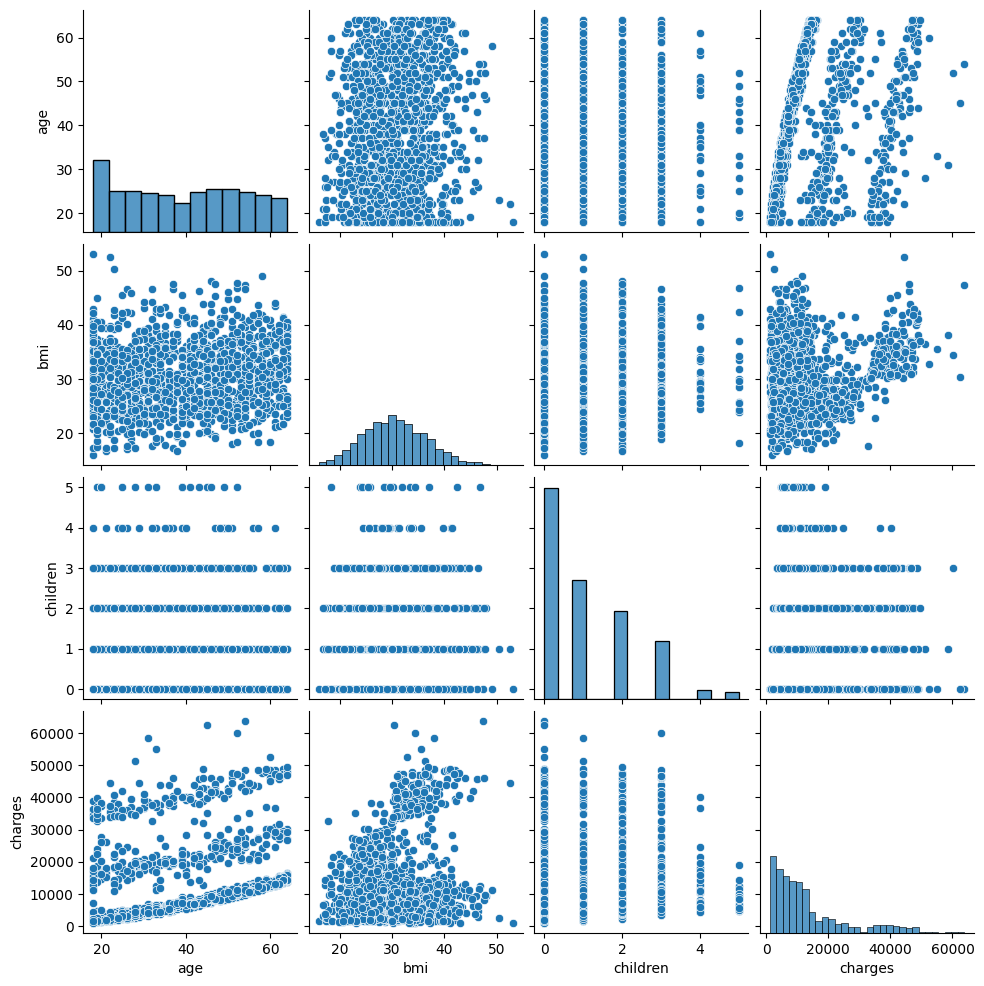

In [ ]:
sns.pairplot(df)
plt.show()

Define Features: The features list contains categorical variables that may influence charges (insurance costs).

Show the Plot: plt.show() displays the four bar charts, each showing the relationship between a categorical feature and average insurance charges.

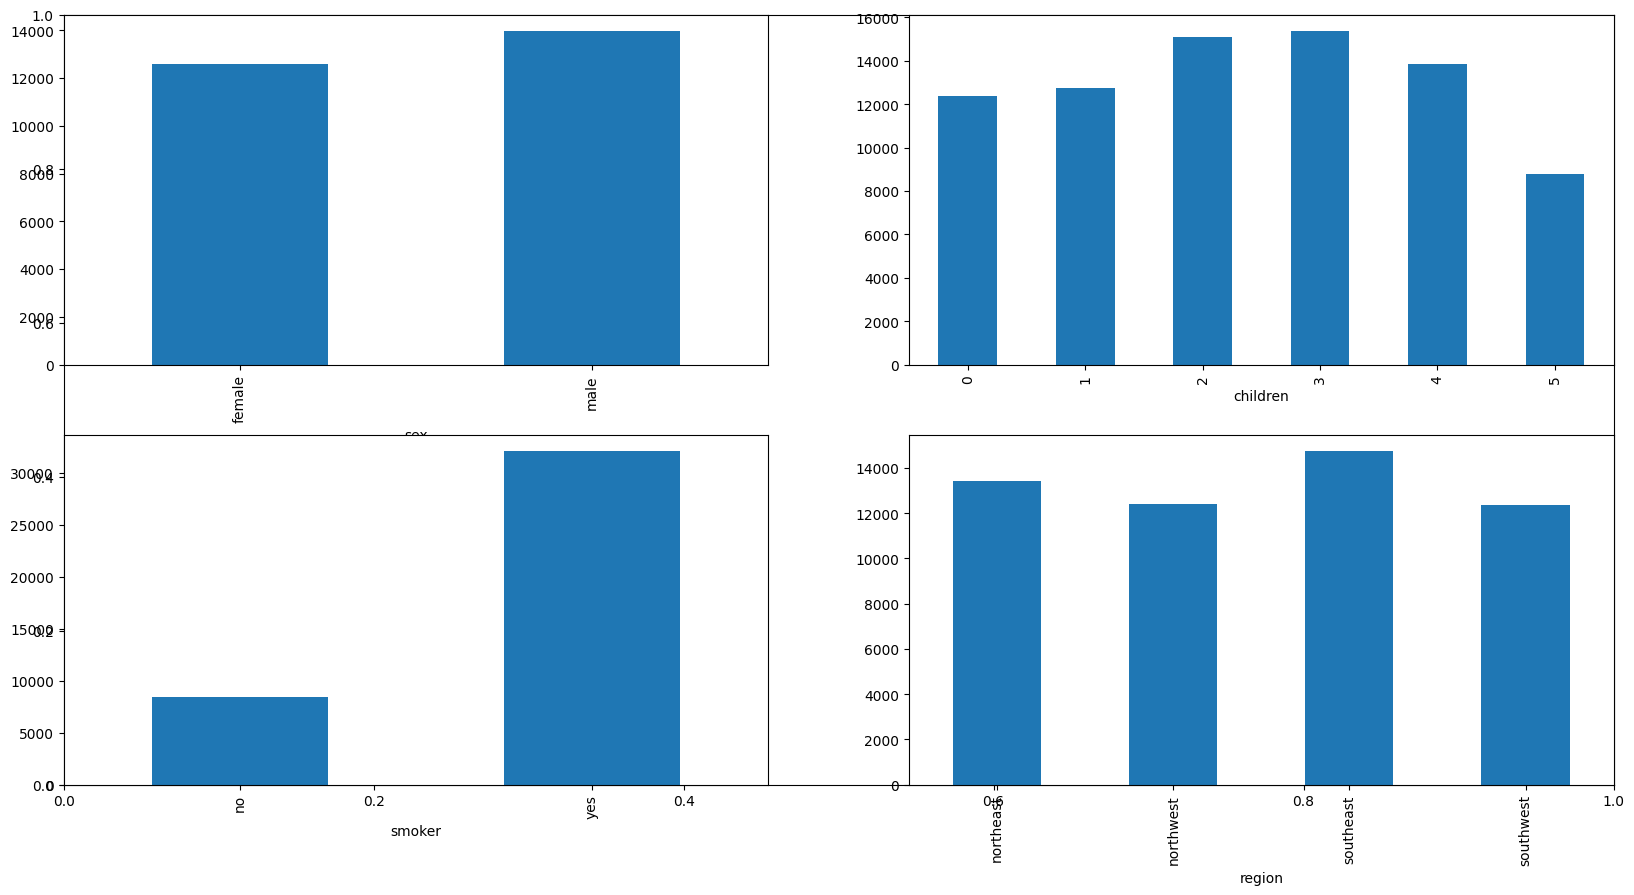

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

This code creates scatter plots to visualize the relationship between charges (insurance costs) and two numerical features: age and bmi

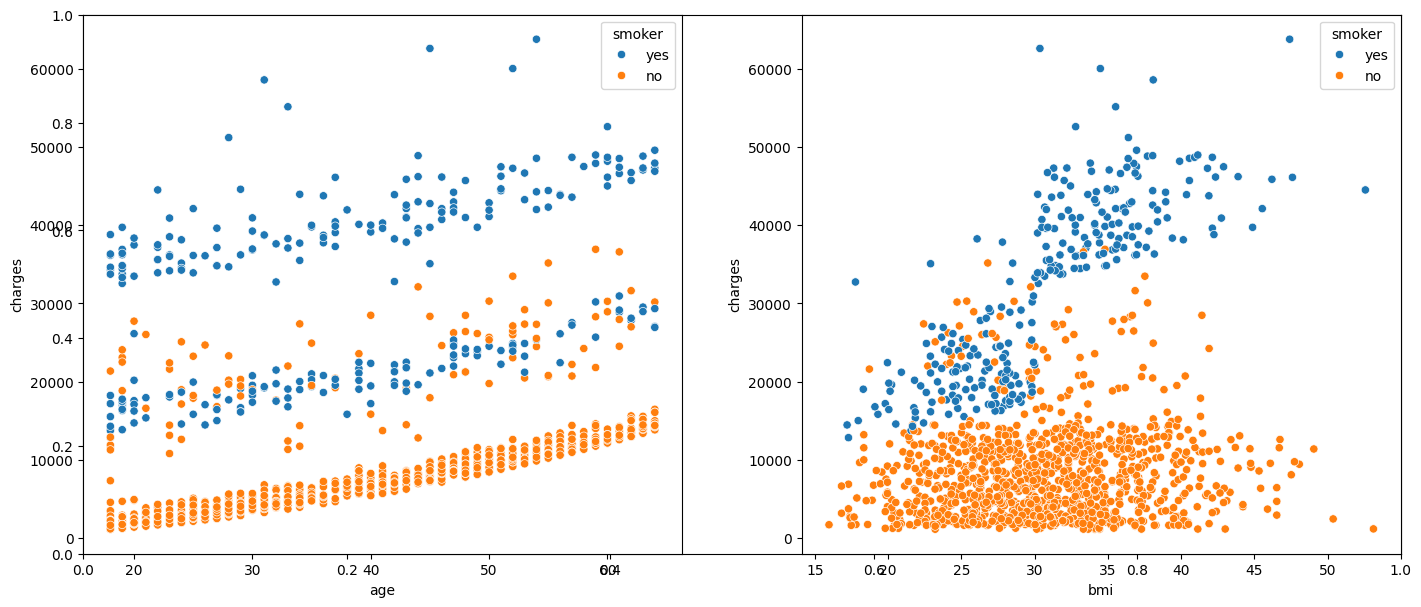

In [ ]:
features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

This code converts categorical columns into numerical values for easier analysis and machine learning:

sex: 'male' → 0, 'female' → 1
smoker: 'yes' → 1, 'no' → 0
region: 'northwest' → 0, 'northeast' → 1, 'southeast' → 2, 'southwest' → 3

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

This code separates the dataset into features (X) and the target variable (Y):

X (Independent Variables): All columns except 'charges' (features used to predict charges).


In [ ]:
X=df.drop(['charges'],axis=1)
Y=df[['charges']]

This code splits the dataset into training and testing sets using scikit-learn:

train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

This function scales numerical features (age, bmi, children) in the training and testing datasets using standardization (mean = 0, standard deviation = 1)

Convert Data to NumPy Arrays

Identify Numerical Columns

Calculate Mean and Standard Deviation

Apply Standardization
X
scaled
​
 =
(x-mean)/(std+1e-8)

Return Scaled Data & Statistics


In [ ]:
def scale_numerical_features(X_train, X_test):
    """Scale numerical features (age, bmi, children)"""
    X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
    X_test_np = X_test.values if hasattr(X_test, 'values') else X_test

    X_train_scaled = X_train_np.copy()
    X_test_scaled = X_test_np.copy()

    # Scale numerical columns (age, bmi, children)
    numerical_cols = [0, 2, 3]

    mean = np.mean(X_train_np[:, numerical_cols], axis=0)
    std = np.std(X_train_np[:, numerical_cols], axis=0)

    X_train_scaled[:, numerical_cols] = (X_train_np[:, numerical_cols] - mean) / (std + 1e-8)
    X_test_scaled[:, numerical_cols] = (X_test_np[:, numerical_cols] - mean) / (std + 1e-8)

    return X_train_scaled, X_test_scaled, mean, std

This function scales the target variable (y_train and y_test) using standardization (mean = 0, std = 1).

 Ensures y_train and y_test are NumPy arrays.

 Apply Standardization
y
scaled
​
 =
(y-mean)/(std+1e-8)


 Return Scaled Values & Statistics: y_train_scaled, y_test_scaled, y_mean, and y_std

In [ ]:
def scale_target(y_train, y_test):
    """Scale target variable"""
    y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
    y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

    if len(y_train_np.shape) == 1:
        y_train_np = y_train_np.reshape(-1, 1)
    if len(y_test_np.shape) == 1:
        y_test_np = y_test_np.reshape(-1, 1)

    y_mean = np.mean(y_train_np)
    y_std = np.std(y_train_np)

    y_train_scaled = (y_train_np - y_mean) / (y_std + 1e-8)
    y_test_scaled = (y_test_np - y_mean) / (y_std + 1e-8)

    return y_train_scaled, y_test_scaled, y_mean, y_std

Initialization (__init__ method):

> This method sets up the initial state of the PolynomialRegression object.

> It takes three optional parameters: alpha (regularization strength), learning_rate (step size for gradient descent), and n_iterations (number of iterations for training).

> It initializes the weights to None and creates an empty list losses to store the loss values during training.

> Feature Creation (create_features method):

> This method generates polynomial features from the input data X.

> It ensures that X is a numpy array and extracts individual features such as age, sex, bmi, children, smoker, and region.

> It creates various polynomial and interaction features, including bias term, linear terms, polynomial terms (squared features), and interactions between features.

> Finally, it returns the generated features as a single matrix.

Model Training (fit method):

> This method trains the polynomial regression model using gradient descent.

> It first ensures that y is a numpy array and reshapes it if necessary.

> It then creates polynomial features using the create_features method.

> It initializes the weights to zeros.

> The method iterates over a specified number of iterations (n_iterations), performing the following steps in each iteration:

> Calculates the predicted values (y_pred).

> Computes the mean squared error (MSE) loss and adds the L2 regularization term.

> Computes the gradients of the loss with respect to the weights.

> Updates the weights using the computed gradients and learning rate.

> It stores the loss values in the losses list and prints the loss every 100 iterations.


Prediction (predict method):

> This method generates predictions using the trained model.

> It transforms the input features X into polynomial features using the create_features method.

> It performs matrix multiplication between the polynomial features (X_poly) and the learned weights (self.weights) to obtain the predicted values.

In [ ]:
class PolynomialRegression:
    def __init__(self, alpha=0.1, learning_rate=0.01, n_iterations=1000):
        self.alpha = alpha
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.losses = []

    def create_features(self, X):
        """Create polynomial features"""
        # Ensure X is numpy array
        X = X.values if hasattr(X, 'values') else X
        n_samples = X.shape[0]

        # Extract features
        age = X[:, 0:1]
        sex = X[:, 1:2]
        bmi = X[:, 2:3]
        children = X[:, 3:4]
        smoker = X[:, 4:5]
        region = X[:, 5:6]

        features = []

        # Bias term
        features.append(np.ones((n_samples, 1)))

        # Linear terms
        features.extend([age, sex, bmi, children, smoker, region])

        # Polynomial terms for numerical features
        features.extend([
            age**2,
            bmi**2,
            children**2,
            age * bmi,
            age * children,
            bmi * children
        ])

        # Interactions with categorical
        features.extend([
            age * smoker,
            bmi * smoker,
            children * smoker,
            age * sex,
            bmi * sex,
            children * sex
        ])

        # Categorical interactions
        features.extend([
            sex * smoker,
            sex * region,
            smoker * region
        ])

        return np.hstack(features)

    def fit(self, X, y):
        # Convert y to numpy array if needed
        y = y.values if hasattr(y, 'values') else y
        if len(y.shape) == 1:
            y = y.reshape(-1, 1)

        # Create features
        X_poly = self.create_features(X)
        n_features = X_poly.shape[1]

        # Initialize weights
        self.weights = np.zeros((n_features, 1))

        # Gradient descent
        m = len(y)
        for i in range(self.n_iterations):
            # Forward pass
            y_pred = X_poly @ self.weights

            # Compute loss
            mse = np.mean((y - y_pred)**2)
            l2_reg = self.alpha * np.sum(self.weights**2)
            loss = mse + l2_reg
            self.losses.append(loss)

            # Compute gradients
            dw = (-2/m) * X_poly.T @ (y - y_pred) + 2 * self.alpha * self.weights

            # Update weights
            self.weights -= self.lr * dw

            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        X_poly = self.create_features(X)
        return X_poly @ self.weights

The mean_squared_error function calculates the Mean Squared Error (MSE) between the true values (y_true) and the predicted values (y_pred)

In [ ]:
# Helper functions for evaluation
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

xtrain and xtest are passed to scale_numerical_features to scale the numerical columns (age, bmi, children) in the training and test datasets.

ytrain and ytest are passed to scale_target to scale the target variable in the training and test datasets.

In [ ]:
# Scale features and target
X_train_scaled, X_test_scaled, X_mean, X_std = scale_numerical_features(xtrain, xtest)
y_train_scaled, y_test_scaled, y_mean, y_std = scale_target(ytrain, ytest)

Initializing and training a PolynomialRegression model with specific parameters

In [ ]:
# Create and train model
model = PolynomialRegression(
    alpha=0.01,
    learning_rate=0.001,
    n_iterations=100000
)


The fit method will now train your PolynomialRegression model using the scaled training data (X_train_scaled and y_train_scaled)

In [ ]:
# Fit model
model.fit(X_train_scaled, y_train_scaled)

Iteration 0, Loss: 1.0000
Iteration 100, Loss: 0.8126
Iteration 200, Loss: 0.6804
Iteration 300, Loss: 0.5850
Iteration 400, Loss: 0.5149
Iteration 500, Loss: 0.4627
Iteration 600, Loss: 0.4233
Iteration 700, Loss: 0.3931
Iteration 800, Loss: 0.3697
Iteration 900, Loss: 0.3513
Iteration 1000, Loss: 0.3368
Iteration 1100, Loss: 0.3251
Iteration 1200, Loss: 0.3156
Iteration 1300, Loss: 0.3078
Iteration 1400, Loss: 0.3012
Iteration 1500, Loss: 0.2957
Iteration 1600, Loss: 0.2909
Iteration 1700, Loss: 0.2868
Iteration 1800, Loss: 0.2832
Iteration 1900, Loss: 0.2799
Iteration 2000, Loss: 0.2770
Iteration 2100, Loss: 0.2743
Iteration 2200, Loss: 0.2719
Iteration 2300, Loss: 0.2697
Iteration 2400, Loss: 0.2676
Iteration 2500, Loss: 0.2656
Iteration 2600, Loss: 0.2637
Iteration 2700, Loss: 0.2620
Iteration 2800, Loss: 0.2603
Iteration 2900, Loss: 0.2587
Iteration 3000, Loss: 0.2572
Iteration 3100, Loss: 0.2557
Iteration 3200, Loss: 0.2543
Iteration 3300, Loss: 0.2530
Iteration 3400, Loss: 0.25

These lines use the predict method of your PolynomialRegression model to generate scaled predictions for both the training and test datasets.

In [ ]:
# Make predictions and unscale them
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)


This will give you the unscaled predictions for both the training and test datasets.

In [ ]:
# Unscale predictions
y_train_pred = y_train_pred_scaled * (y_std + 1e-8) + y_mean
y_test_pred = y_test_pred_scaled * (y_std + 1e-8) + y_mean


This will generate mean square error

In [ ]:
# Compute metrics
train_mse = np.mean((y_train_scaled - y_train_pred_scaled)**2)
test_mse = np.mean((y_test_scaled - y_test_pred_scaled)**2)

Printing the mean square error

In [ ]:
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 0.17
Test MSE: 0.15


It sets the figure size with plt.figure(figsize=(10, 6)), plots the loss values over iterations with plt.plot(model.losses), adds the title 'Learning Curve' with plt.title('Learning Curve'), labels the x-axis with plt.xlabel('Iteration'), labels the y-axis with plt.ylabel('Loss'), adds a grid with plt.grid(True), and displays the plot with plt.show().

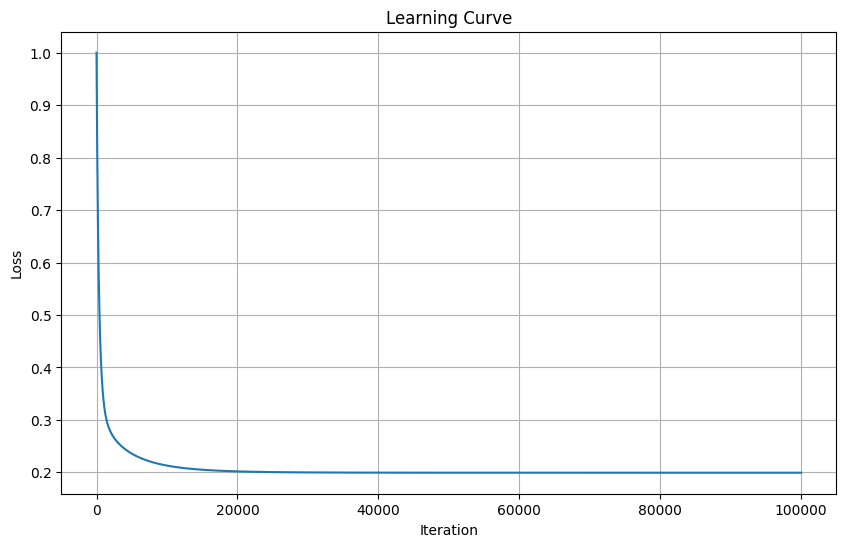

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(model.losses)
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

Calculating root mean square error

In [ ]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)


Printing RMSE

In [ ]:
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 0.41
Test RMSE: 0.39


Calculating R2 score

In [ ]:
train_ss_total = np.sum((y_train_scaled - np.mean(y_train_scaled)) ** 2)
train_ss_residual = np.sum((y_train_scaled - y_train_pred_scaled) ** 2)
train_r2 = 1 - (train_ss_residual / train_ss_total)

test_ss_total = np.sum((y_test_scaled - np.mean(y_test_scaled)) ** 2)
test_ss_residual = np.sum((y_test_scaled - y_test_pred_scaled) ** 2)
test_r2 = 1 - (test_ss_residual / test_ss_total)

Printing R2 score

In [ ]:
print(f"Train R² Score: {train_r2:.2f}")
print(f"Test R² Score: {test_r2:.2f}")

Train R² Score: 0.83
Test R² Score: 0.86


# 3 Degree Polynomial Regression

This PolynomialRegressionDegree3 class implements a polynomial regression model of degree 3 using gradient descent with L2 regularization.

(create_polynomial_features):
Expands input features up to cubic terms (degree 3).
Includes interaction terms between numerical and categorical features.

(fit):
Initializes weights randomly.
Applies gradient descent to minimize Mean Squared Error (MSE) with L2 regularization (to prevent overfitting).
Updates weights iteratively using learning rate (lr) and regularization (alpha).
Stores the loss at each iteration for tracking convergence.

(predict):
Converts input data into polynomial features.
Computes predictions using matrix multiplication with trained weights.

In [ ]:
class PolynomialRegressionDegree3:
    def __init__(self, alpha=0.01, learning_rate=0.001, n_iterations=1000):
        self.alpha = alpha
        self.lr = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.losses = []

    def create_polynomial_features(self, X):
        """Create polynomial features up to degree 3"""
        X = X.values if hasattr(X, 'values') else X
        n_samples = X.shape[0]

        # Extract features
        age = X[:, 0:1]
        sex = X[:, 1:2]
        bmi = X[:, 2:3]
        children = X[:, 3:4]
        smoker = X[:, 4:5]
        region = X[:, 5:6]

        features = []

        # 1. Bias term
        features.append(np.ones((n_samples, 1)))

        # 2. Linear terms
        features.extend([age, sex, bmi, children, smoker, region])

        # 3. Quadratic terms for numerical features
        features.extend([
            age**2,
            bmi**2,
            children**2
        ])

        # 4. Cubic terms for numerical features
        features.extend([
            age**3,
            bmi**3,
            children**3
        ])

        # 5. Second-order interactions between numerical features
        features.extend([
            age * bmi,
            age * children,
            bmi * children
        ])

        # 6. Third-order interactions between numerical features
        features.extend([
            age * bmi * children
        ])

        # 7. Interactions with categorical features
        # Second-order
        features.extend([
            age * smoker,
            bmi * smoker,
            children * smoker,
            age * sex,
            bmi * sex,
            children * sex,
            sex * smoker,
            sex * region,
            smoker * region
        ])

        # Third-order with categorical
        features.extend([
            age * bmi * smoker,
            age * children * smoker,
            bmi * children * smoker,
            age * bmi * sex,
            age * children * sex,
            bmi * children * sex
        ])

        return np.hstack(features)

    def fit(self, X, y):
        # Create polynomial features
        X_poly = self.create_polynomial_features(X)
        n_features = X_poly.shape[1]

        # Initialize weights
        self.weights = np.random.randn(n_features, 1) * 0.01

        # Gradient descent
        m = len(y)
        for i in range(self.n_iterations):
            # Forward pass
            y_pred = X_poly @ self.weights

            # Compute loss
            mse = np.mean((y - y_pred)**2)
            l2_reg = self.alpha * np.sum(self.weights**2)
            loss = mse + l2_reg
            self.losses.append(loss)

            # Compute gradients
            dw = (-2/m) * X_poly.T @ (y - y_pred) + 2 * self.alpha * self.weights

            # Update weights
            self.weights -= self.lr * dw

            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        X_poly = self.create_polynomial_features(X)
        return X_poly @ self.weights

he code standardizes both the features (X) and the target (y) by subtracting the mean and dividing by the standard deviation.

scale_numerical_features() scales xtrain and xtest.
scale_target() scales ytrain and ytest

In [ ]:
# Scale features and target
X_train_scaled, X_test_scaled, X_mean, X_std = scale_numerical_features(xtrain, xtest)
y_train_scaled, y_test_scaled, y_mean, y_std = scale_target(ytrain, ytest)

Polynomial regression model with degree 3 will fit your data by minimizing the error with a small learning rate and regularization to avoid overfitting.



In [ ]:
# Create and train model
model = PolynomialRegressionDegree3(
        alpha=0.01,
        learning_rate=0.001,
        n_iterations=10000
)

To fit your polynomial regression model to the training data, the code model.fit(X_train_scaled, y_train_scaled) will adjust the model's parameters using the provided scaled training data features (X_train_scaled) and corresponding scaled target values (y_train_scaled)

In [ ]:
# Fit model
model.fit(X_train_scaled, y_train_scaled)

Iteration 0, Loss: 1.0571
Iteration 100, Loss: 0.7992
Iteration 200, Loss: 0.6709
Iteration 300, Loss: 0.5807
Iteration 400, Loss: 0.5137
Iteration 500, Loss: 0.4630
Iteration 600, Loss: 0.4243
Iteration 700, Loss: 0.3945
Iteration 800, Loss: 0.3712
Iteration 900, Loss: 0.3529
Iteration 1000, Loss: 0.3383
Iteration 1100, Loss: 0.3266
Iteration 1200, Loss: 0.3170
Iteration 1300, Loss: 0.3091
Iteration 1400, Loss: 0.3024
Iteration 1500, Loss: 0.2967
Iteration 1600, Loss: 0.2918
Iteration 1700, Loss: 0.2875
Iteration 1800, Loss: 0.2838
Iteration 1900, Loss: 0.2804
Iteration 2000, Loss: 0.2773
Iteration 2100, Loss: 0.2745
Iteration 2200, Loss: 0.2720
Iteration 2300, Loss: 0.2696
Iteration 2400, Loss: 0.2673
Iteration 2500, Loss: 0.2652
Iteration 2600, Loss: 0.2633
Iteration 2700, Loss: 0.2614
Iteration 2800, Loss: 0.2596
Iteration 2900, Loss: 0.2579
Iteration 3000, Loss: 0.2563
Iteration 3100, Loss: 0.2548
Iteration 3200, Loss: 0.2533
Iteration 3300, Loss: 0.2518
Iteration 3400, Loss: 0.25

Make predictions using the scaled training and test data.

Unscale Predictions:

Convert the scaled predictions back to the original scale using the target mean and standard deviation.

In [ ]:
# Make predictions and unscale them
y_train_pred_scaled = model.predict(X_train_scaled)
y_test_pred_scaled = model.predict(X_test_scaled)

y_train_pred = y_train_pred_scaled * (y_std + 1e-8) + y_mean
y_test_pred = y_test_pred_scaled * (y_std + 1e-8) + y_mean

Calculating mean squared error

In [ ]:
# Compute metrics
train_mse = np.mean((y_train_scaled - y_train_pred_scaled)**2)
test_mse = np.mean((y_test_scaled - y_test_pred_scaled)**2)

Printing the MSE

In [ ]:
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 0.19
Test MSE: 0.18


Generating the loss curve through iterations

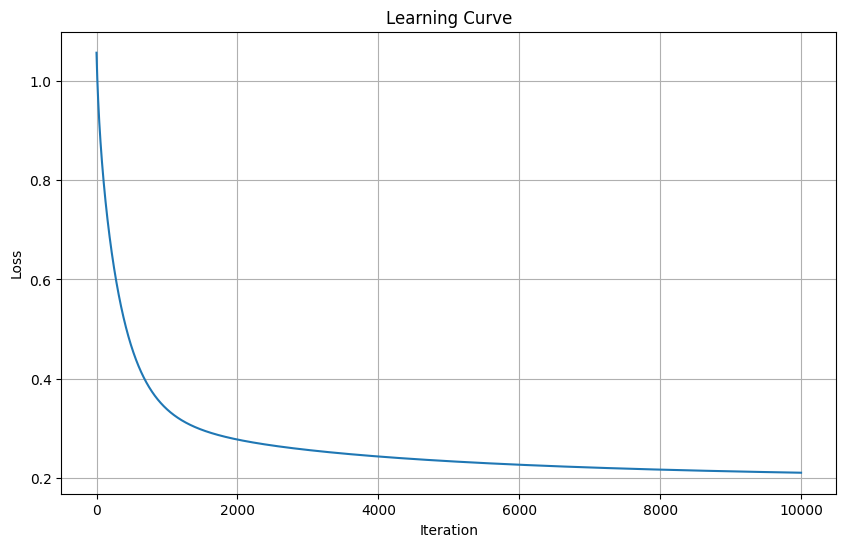

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(model.losses)
plt.title('Learning Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

calculating MSE

In [ ]:
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

Printing the MSE

In [ ]:
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train RMSE: 0.44
Test RMSE: 0.42


Calculating R2 score

In [ ]:
train_ss_total = np.sum((y_train_scaled - np.mean(y_train_scaled)) ** 2)
train_ss_residual = np.sum((y_train_scaled - y_train_pred_scaled) ** 2)
train_r2 = 1 - (train_ss_residual / train_ss_total)

test_ss_total = np.sum((y_test_scaled - np.mean(y_test_scaled)) ** 2)
test_ss_residual = np.sum((y_test_scaled - y_test_pred_scaled) ** 2)
test_r2 = 1 - (test_ss_residual / test_ss_total)

Printing the R2 score

In [ ]:
 print(f"Train R² Score: {train_r2:.2f}")
print(f"Test R² Score: {test_r2:.2f}")

Train R² Score: 0.81
Test R² Score: 0.83
